# Homework 7

This homework is all about Astropy and Differential Equations. Astropy is an incredibly useful library for unit conversions and constants; it is used consistently in astro research. Diff Eqs are more widely applicable since they allow us to find the evolution of quantities whose relationships are defined through their derivative; for example, we can find the path of a projectile from the local constant of acceleration.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as c
from scipy.integrate import odeint

# Astropy (40 Points)

## CRAZY UNIT CONVERSION!!! (20 Points)

As you take more astronomy classes, you will face more and more unit conversion problems - they are annoying. That's why astropy.units is very helpful. Let's do some practices here.

The documentations for astropy.units and astropy.constants will very helpful to you.

astropy.units documentation: https://docs.astropy.org/en/stable/units/

astropy.constants documentation: https://docs.astropy.org/en/stable/constants/

NOTE: In this problem, you MUST use astropy.constants when doing calculations involving fundamental constants. Also, you cannot look up values such as solar mass, earth mass, etc. Use the two packages solely.

### Problem 1.1) Speed of light (5 Points)

What is the speed of light ($c$) in $pc/yr$?

In [2]:
### Write your code here
import astropy.constants as cons 
import astropy.units as u 

cons.c.to(u.pc / u.yr)

<Quantity 0.30660139 pc / yr>

### Problem 1.2) Newton's 2nd Law (5 Points)

Recall that NII states 
$$F =ma\,\,.$$
Say a force of $97650134N$ is exerted on an object having a mass of $0.0071$ earth mass. What is the acceleration of the object in $AU/days^2$?

In [3]:
### Write your code here

a = (97650134 * u.N) / (0.0071*u.M_earth) #a = F/m
a.to(u.AU / (u.d)**2)

<Quantity 1.14917074e-16 AU / d2>

### Problem 1.3) Newton's Universal Law of Gravitation (10 Points)

Recall that the gravitational acceleration due to an object with mass $m$ at a distance $r$ is given by 
$$a_g = \frac{Gm}{r^2}\,\,.$$
What is the gravitational acceleration due to a planet of $3.1415926$ Jupiter-mass at a distance of $1.523AU$? Give your answer in $pc/yr^2$.

In [4]:
### Write your code here

a = cons.G*(3.1415926*cons.M_jup)/(1.523*u.AU)**2 
a.to(u.pc / (u.yr)**2)

<Quantity 2.47449776e-07 pc / yr2>

## Problem 1.4:
### Visualising Coordinate Transformation (20 Points)

We introduced coordinate transformation using astropy, but maybe that was too astract to you, so let's use this problem as a way for you to visualise this process. Each part will be worth **5 Points**

There are several things you need to do:
1. Open up the FITS file named 'clusters.fits' (this part of the code is written for you already)


2. Read it as a table using astropy.table (you will have to import the packages you need and write your own code from hereafter)


3. Plot the positions of all the objects in the table, COLOUR-CODED by their types (there is a column named 'CLASS'), with RA on the x-axis and DEC on the y-axis. You should see a curved trend with a huge dip in the middle.


4. Carry out a coordinate transformation from the ICRS coordinates to the galactic coordinates - there is a column named "DISTANCE" which you will need. 


5. Now plot the position of all the objects in the galactic coordinates, with $\ell$ on the x-axis and $b$ on the y-axis; again, colour-code everything by their "CLASS". If you did everything correctly, you should see that the curve in the previous plot resembles a horizontal band. 


6. Answer this question: What is that curved band in the first plot and the horizontal band in the second plot? Does it make sense that the band got straightened up? Why?


Note: When you make your plots, please include the axis labels with units and the legend.

In [5]:
from astropy.io import fits
#You will have to import other packages to complete this problem 

###IMPORT YOUR OTHER PACKAGES HERE 

from astropy.table import Table
from astropy.coordinates import SkyCoord 
import matplotlib.pyplot as plt
import numpy as np


In [6]:
fits_file = fits.open('clusters.fits')
data = Table.read(fits_file)
ra = np.array([data['RA']])
ra


FileNotFoundError: [Errno 2] No such file or directory: 'clusters.fits'

['                                             NEBULA\n'
 '                                       UNIDENTIFIED\n'
 '                                  OPEN STAR CLUSTER\n'
 '                          OB ASSOCIATION/HII REGION\n'
 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC\n']


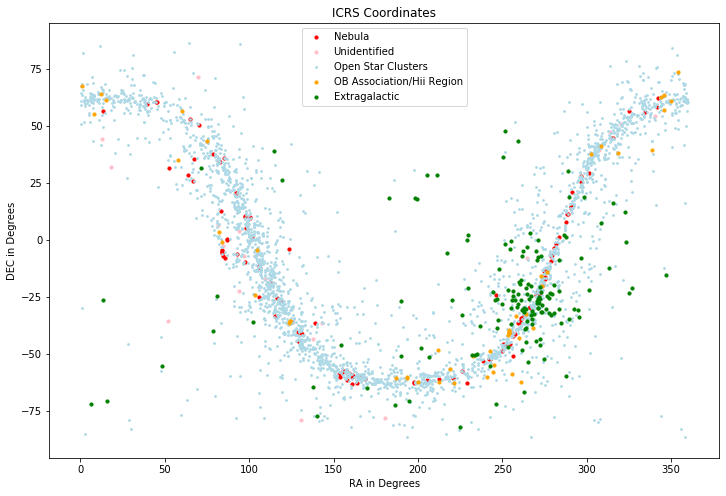

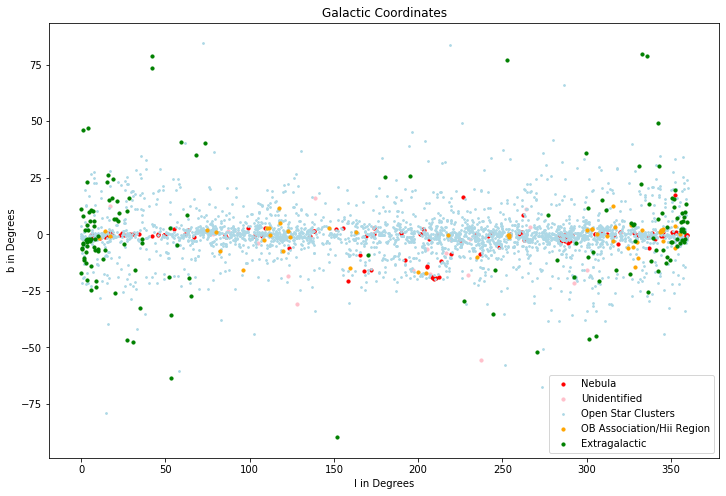

In [21]:
fits_file = fits.open('clusters.fits')

#To read the fits file as a table, simply run the line: Table.read(fits_file)
#Although you will have to write up your code to get that Table function 

### YOUR CODE HERE

data = Table.read(fits_file)
CLASS = np.array(data['CLASS'])

ra_data = np.array(data['RA'])
dec_data = np.array(data['DEC'])


print(np.unique(CLASS))

RA1,DEC1 = [], []
RA2,DEC2 = [], []
RA3,DEC3 = [], []
RA4,DEC4 = [], []
RA5,DEC5 = [], []

for i in range(len(ra_data)): 
    if CLASS[i] == '                                             NEBULA\n':
        RA1.append(ra_data[i])
        DEC1.append(dec_data[i]) 
    elif CLASS[i] == '                                       UNIDENTIFIED\n':
        RA2.append(ra_data[i])
        DEC2.append(dec_data[i]) 
    elif CLASS[i] == '                                  OPEN STAR CLUSTER\n':
        RA3.append(ra_data[i])
        DEC3.append(dec_data[i]) 
    elif CLASS[i] == '                          OB ASSOCIATION/HII REGION\n':
        RA4.append(ra_data[i])
        DEC4.append(dec_data[i]) 
    else:
        RA5.append(ra_data[i])
        DEC5.append(dec_data[i])
        
        
        
plt.figure(figsize=(12,8))
plt.scatter(RA1,DEC1,s = 10, c = 'red', label = 'Nebula')
plt.scatter(RA2,DEC2,s = 10, c = 'pink', label = 'Unidentified')
plt.scatter(RA3,DEC3,s = 3, c = 'lightblue', label = 'Open Star Clusters')
plt.scatter(RA4,DEC4,s = 10, c = 'orange', label = 'OB Association/Hii Region')
plt.scatter(RA5,DEC5,s = 10, c = 'green', label = 'Extragalactic')

plt.xlabel('RA in Degrees')
plt.ylabel('DEC in Degrees')
plt.legend()
plt.title('ICRS Coordinates')
plt.show()

#################################################################
#################################################################

dist = np.array(data['DISTANCE'])
icrs = SkyCoord(ra=ra_data*u.deg, dec=dec_data*u.deg)
GAL = icrs.transform_to('galactic')
L_data = np.array(GAL.l)
B_data = np.array(GAL.b)


L1,B1 = [], []
L2,B2 = [], []
L3,B3 = [], []
L4,B4 = [], []
L5,B5 = [], []


for i in range(len(ra_data)): 
    if CLASS[i] == '                                             NEBULA\n':
        L1.append(L_data[i])
        B1.append(B_data[i]) 
    elif CLASS[i] == '                                       UNIDENTIFIED\n':
        L2.append(L_data[i])
        B2.append(B_data[i]) 
    elif CLASS[i] == '                                  OPEN STAR CLUSTER\n':
        L3.append(L_data[i])
        B3.append(B_data[i]) 
    elif CLASS[i] == '                          OB ASSOCIATION/HII REGION\n':
        L4.append(L_data[i])
        B4.append(B_data[i]) 
    else:
        L5.append(L_data[i])
        B5.append(B_data[i])


plt.figure(figsize=(12,8))
plt.scatter(L1,B1 , s = 10, c = 'red', label = 'Nebula')
plt.scatter(L2,B2 , s = 10, c = 'pink', label = 'Unidentified')
plt.scatter(L3,B3 , s = 3, c = 'lightblue', label = 'Open Star Clusters')
plt.scatter(L4,B4 , s = 10, c = 'orange', label = 'OB Association/Hii Region')
plt.scatter(L5,B5 , s = 10, c = 'green', label = 'Extragalactic')
plt.xlabel('l in Degrees')
plt.ylabel('b in Degrees')
plt.title('Galactic Coordinates')
plt.legend()
plt.show()


# Ordinary Differential Equations

Let's talk about ordinary differential equations! They are something you will see over and over again in physics and math courses. As we went over in lecture, ODEs are important for determining equations that are defined by their rates of change. An example that you will encounter early on is projectiles. We will be looking at an ideal projectile that does not experience drag or any other force aside from gravity. That equation is shown as:

$$F = ma = mg$$

And the diagram we use to demonstrate what is happening is shown here:

<img src='https://useruploads.socratic.org/TBOrceq2QFaPSZx9AUfN_projectile-motion.gif' width="600" height="400">

The ODEs come in because the acceleration is defined as:

$$a = \frac{d^2x}{dt^2}$$

So if we combine the top equation with this equation:

$$\frac{d^2x}{dt^2} = g$$

This equation is essentially saying that the second derivative of the position of the projectile is constant and equal to the constant of gravity on the surface of earth:

$$g = 9.8 m/s^2$$

We want to find the position of the projectile, which we could do by taking two integrals of that acceleration, which would get us a parabolic equation with some initial conditions. In this case, it is a fairly easy integral to do by hand, but as you get further into math and physics you get very complex ODEs so computers come in to do these ODEs numerically; there are some diff eqs that can only be solved numerically with computers.

## Problem 2 (25 points)

Using `scipy.integrate.odeint()` or any other ODE function you can find that works for you and the initial conditions given to you below to graph the projectile's path and graph the projectile's velocity in a way that is clear and concise. 

Hint: you will need to define a function that returns the first and second derivatives of position (velocity and acceleration respectively) for your `scipy.integrate.odeint()`. Make sure that you keep up the documentation for whatever function you choose. Here is the docs for the one we recommend: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html. 

In [7]:
###initial conditions for 2 dimensions##

m = 1 #mass being thrown, kg

#init velocity
v = np.array([5, 5]) #m/s

#init pos
r = np.array([0,0]) #meters

In [8]:
#This function returns an array with the first and second derivatives of position
def projectile(w, t):
    r1 = w[:2]
    #this v1 is the initial condition for the first derivative of position
    v1 = w[2:4]
    # g is the second derivative of position
    g = -9.18
    
    return np.array([v1, [g,g]]).flatten()

In [10]:
#the time can be anything
time = np.linspace(0,2, 100)

init_params = np.append(r, v)
# print(init_params)
ret = odeint(projectile, init_params, time)
pos = ret[:,:2]
vel = ret[:,2:4]

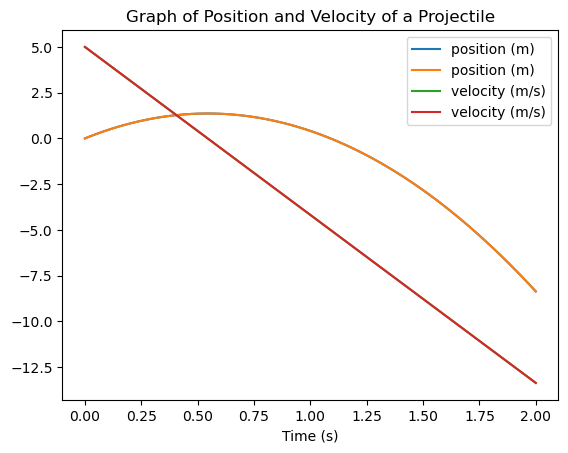

In [17]:
plt.figure()
plt.plot(time, pos[:,:2], label = 'position (m)')
plt.plot(time, vel[:,:2], label = 'velocity (m/s)')
plt.xlabel('Time (s)')
plt.title('Graph of Position and Velocity of a Projectile')
plt.legend()
plt.show()